<a href="https://colab.research.google.com/github/anamunoz01/PREPROCESAMIENTO/blob/main/Procesamientomario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

31/11/2022

In [ ]:
import cv2 as cv

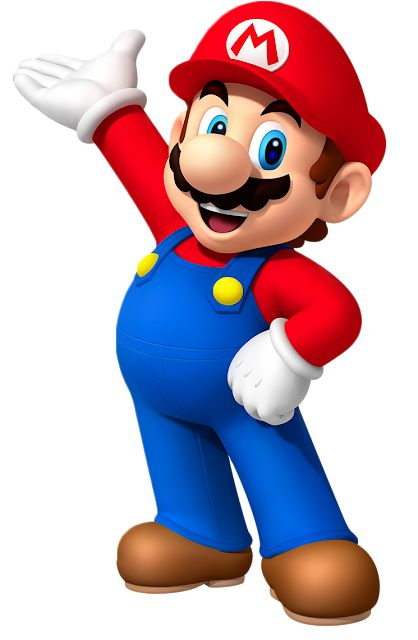

In [ ]:
from google.colab.patches import cv2_imshow
imagen = cv.imread("Mario (1).jpg")
cv2_imshow(imagen)

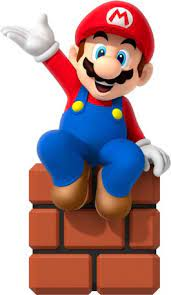

In [ ]:
imagen2 = cv.imread("mario2.jpg")
cv2_imshow(imagen2)

In [ ]:
print(imagen.shape)

(640, 418, 3)


matriz dimensiones 

3 -> RGB  en python el orden es **BGR**!!!

Para pasarla a gris:

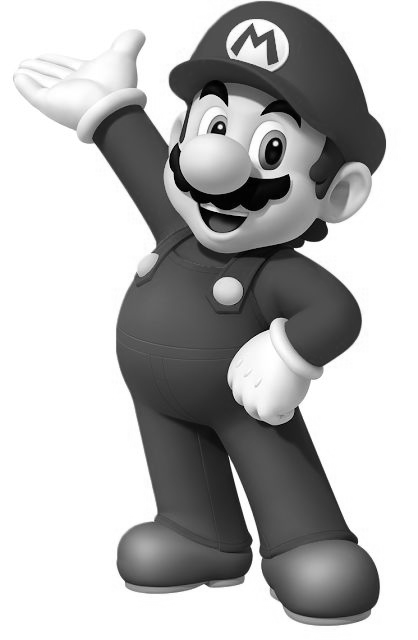

In [ ]:
imagen_gray = cv.cvtColor(imagen, cv.COLOR_BGR2GRAY)
cv2_imshow(imagen_gray)

In [ ]:
print(imagen_gray.shape)
print(imagen_gray.dtype)

(640, 418)
uint8


uint8 -> 8 bits positivos (no tiene signo)

In [ ]:
import numpy as np


para ver dos fotos a la vez utilizamos hstack y ponemos dos parentesis porque tiene que ser una tupla

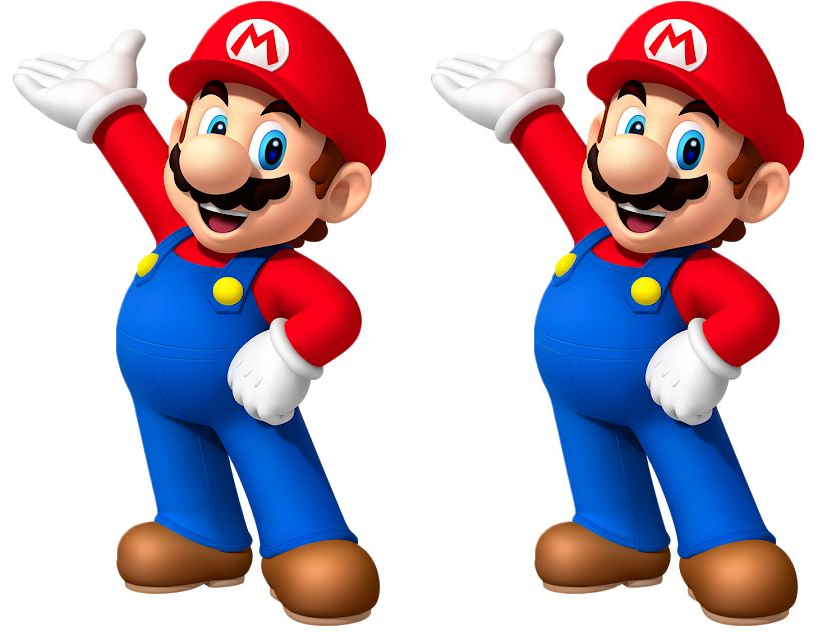

In [ ]:
imagenalpar = np.hstack((imagen, imagen))
cv2_imshow(imagenalpar)

para binarizar utilizamos trheshold

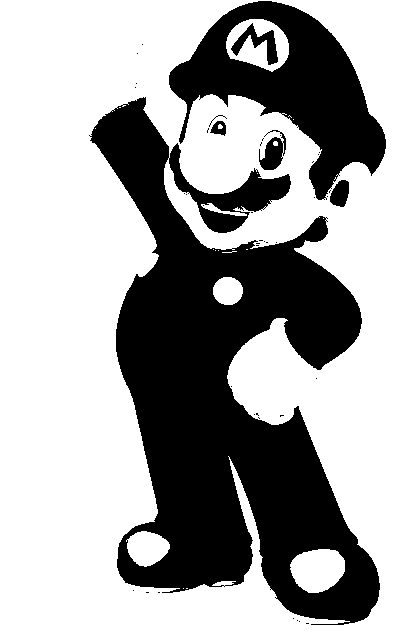

In [ ]:
ret, imagenbw = cv.threshold(imagen_gray,127, 255, cv.THRESH_BINARY)
cv2_imshow(imagenbw)

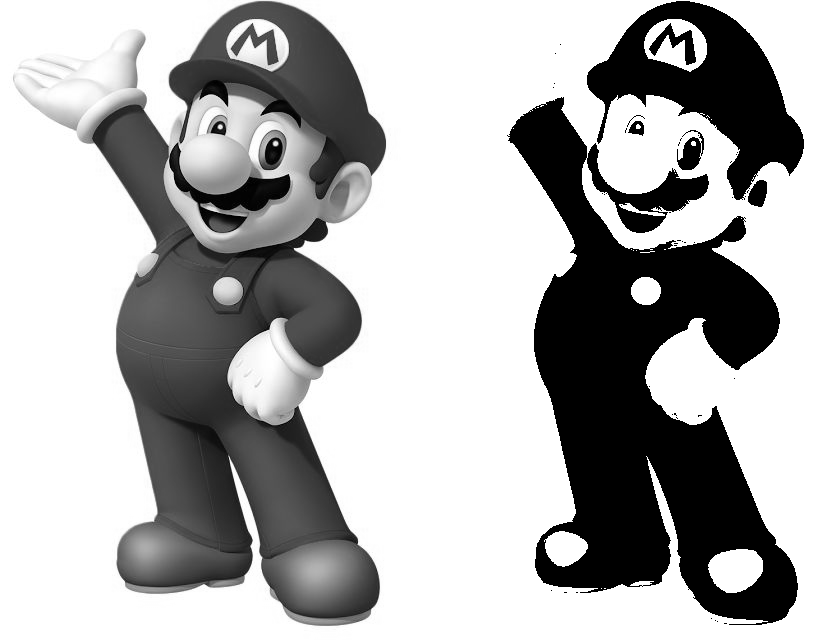

In [ ]:
imagenalpar2 = np.hstack((imagen_gray, imagenbw))
cv2_imshow(imagenalpar2)

In [ ]:
print(ret)

127.0


probamos con ptras funciones de thresh_hold

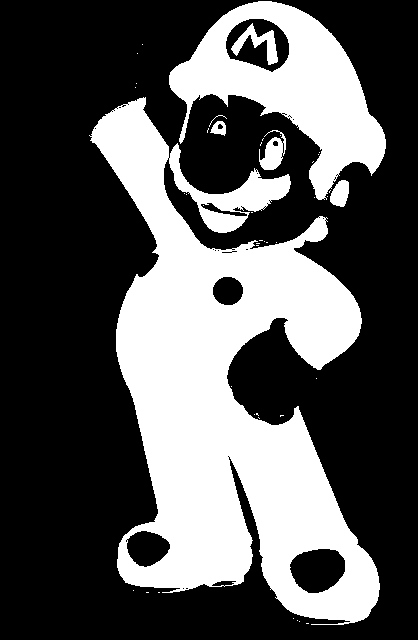

In [ ]:
ret1, imagenbw_inv = cv.threshold(imagen_gray,127, 255, cv.THRESH_BINARY_INV)
cv2_imshow(imagenbw_inv)

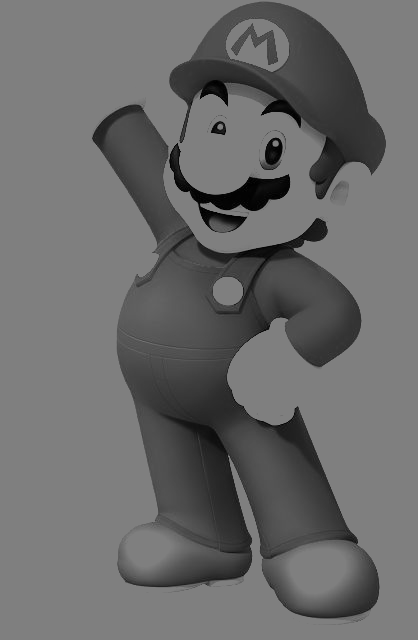

In [ ]:
ret3, imagenbw_trunc = cv.threshold(imagen_gray,127, 255, cv.THRESH_TRUNC)
cv2_imshow(imagenbw_trunc)

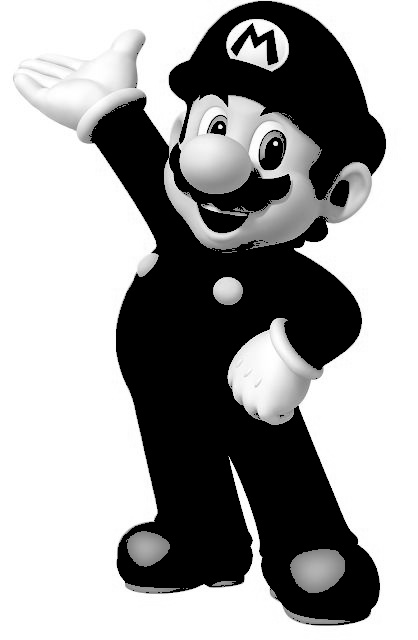

In [ ]:
ret4, imagenbw_tozero = cv.threshold(imagen_gray,127, 255, cv.THRESH_TOZERO)
cv2_imshow(imagenbw_tozero)

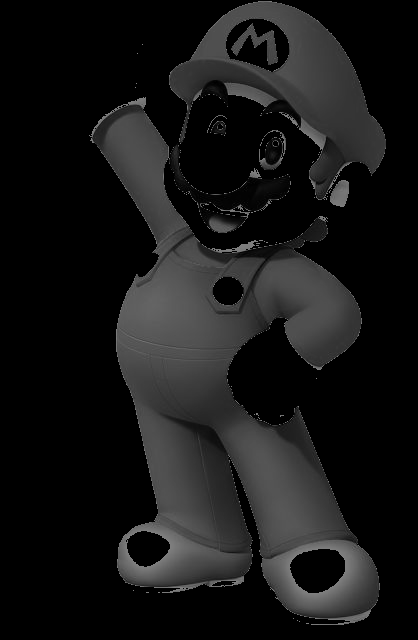

In [ ]:
ret4, imagenbw_tozero_inv = cv.threshold(imagen_gray,127, 255, cv.THRESH_TOZERO_INV)
cv2_imshow(imagenbw_tozero_inv)

si tuviesemos errores veriamos el histograma (Hist)

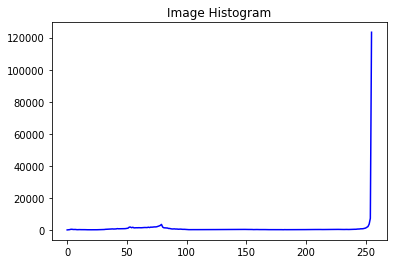

In [ ]:
from matplotlib import pyplot as plt

hist = cv.calcHist([imagen_gray], [0], None, [256], [0,256])
plt.plot(hist, color = 'b')
plt.title('Image Histogram')
plt.show()

aplicamos filtros

np.once : define matriz y la rellena de 1
luego las divido por 25, por la matriz es 5x5 (numero de pixels)
si fuese 9x9 divido por 81 para que quede 1/25 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


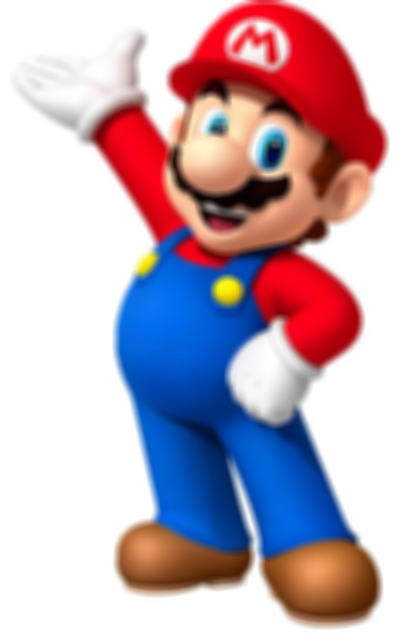

In [ ]:
brush = np.ones((9,9), np.float)/(9*9) #este filtro viene bien para fltros ruidosos

#aplicamos filtro

Image_filter = cv.filter2D(imagen, -1, brush)
cv2_imshow(Image_filter)